# Hour 9: Unveiling Non-Linear Structures with t-SNE 🌀

## 1. Introduction to Non-Linear Dimensionality Reduction

While linear dimensionality reduction techniques like PCA are effective for capturing linear relationships in data, they may fail to reveal complex non-linear structures. In many real-world datasets, the underlying relationships between features are non-linear, requiring non-linear dimensionality reduction techniques.

**Limitations of Linear Methods:**

* **PCA's Linearity:** PCA assumes that the data lies on a linear subspace, which may not be true for complex datasets.
* **Information Loss:** Linear methods can lose valuable information when dealing with non-linear data.
* **Difficulty in Visualization:** Linear methods may not effectively reveal clusters or patterns in non-linear data.

**Importance of Non-Linear Methods:**

* **Revealing Complex Structures:** Non-linear methods can capture non-linear relationships and reveal hidden patterns.
* **Improved Visualization:** Non-linear methods can produce more informative visualizations for complex data.
* **Better Feature Representation:** Non-linear methods can create better feature representations for machine learning models.

**Goals of t-SNE:**

* **Preserving Local Structures:** t-SNE aims to preserve the local similarities between data points.
* **Revealing Clusters:** t-SNE can effectively reveal clusters and patterns in high-dimensional data.

## 2. t-Distributed Stochastic Neighbor Embedding (t-SNE): Theory and Application

t-SNE is a non-linear dimensionality reduction technique that is particularly well-suited for visualizing high-dimensional data in a lower-dimensional space (typically 2D or 3D). It focuses on preserving the local structure of the data, which makes it effective for revealing clusters and patterns.

**Mathematical Foundation:**

1.  **Pairwise Similarities in High-Dimensional Space:**

    * t-SNE calculates the pairwise similarities between data points in the high-dimensional space using a Gaussian distribution.
    * The similarity between points $x_i$ and $x_j$ is represented as a conditional probability $p_{j|i}$, which is proportional to the Gaussian kernel centered at $x_i$.
    * The joint probability $p_{ij}$ is then calculated as the symmetrized conditional probability.
2.  **Pairwise Similarities in Low-Dimensional Space:**

    * In the low-dimensional space, t-SNE calculates the pairwise similarities using a t-distribution with one degree of freedom (also known as a Cauchy distribution).
    * The similarity between points $y_i$ and $y_j$ in the low-dimensional space is represented as $q_{ij}$, which is proportional to the t-distribution.

3.  **Cost Function:**
    * t-SNE minimizes the Kullback-Leibler (KL) divergence between the joint probability distribution $P$ in the high-dimensional space and the probability distribution $Q$ in the low-dimensional space.
    * The KL divergence is a measure of how different two probability distributions are.
    * The goal is to find a low-dimensional representation that minimizes the KL divergence, effectively preserving the local similarities.

**Implementation Steps:**

1.  Calculate pairwise similarities in the high-dimensional space.
2.  Initialize the low-dimensional embeddings randomly.
3.  Calculate pairwise similarities in the low-dimensional space.
4.  Compute the KL divergence and its gradient.
5.  Update the low-dimensional embeddings using gradient descent.
6.  Repeat steps 3-5 until convergence.

## 3. t-SNE Implementation and Interpretation

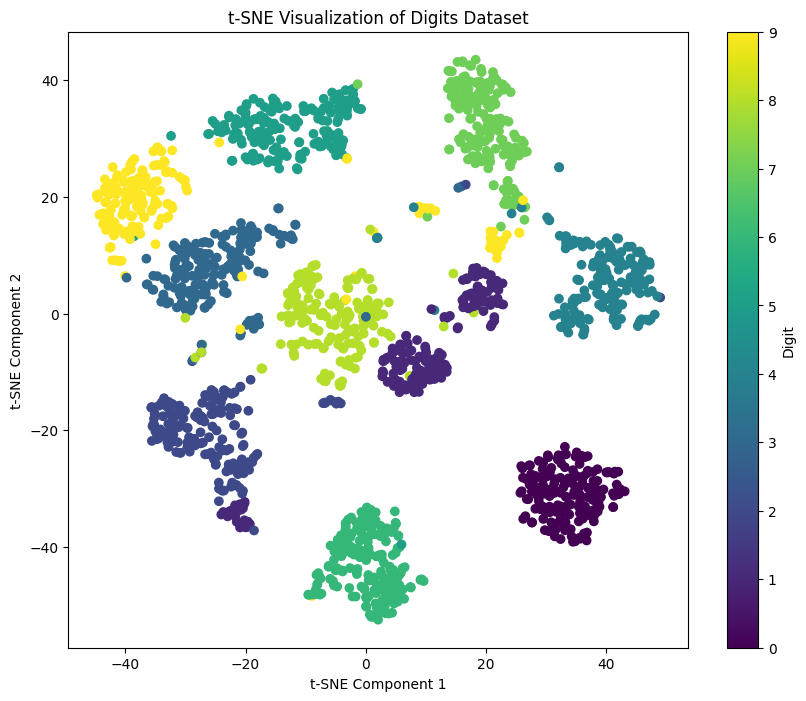

In [1]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the transformed data
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Digits Dataset')
plt.colorbar(ticks=range(10), label='Digit')
plt.show()

## 4. t-SNE Considerations and Limitations

**Computational Complexity:**

* t-SNE has a time complexity of $O(n^2)$, where $n$ is the number of data points.
* This makes it computationally expensive for large datasets.
* Approximations and optimizations are available to improve scalability.

**Interpretation Challenges:**

* t-SNE visualizations can be sensitive to parameter settings (e.g., perplexity, learning rate).
* The global structure of the data may not be preserved; t-SNE primarily focuses on local structures.
* The distances between clusters in the t-SNE plot do not necessarily reflect the distances between clusters in the original high-dimensional space.

**Parameter Tuning:**

* **Perplexity:** Controls the number of nearest neighbors considered when calculating similarities.
* **Learning Rate:** Controls the step size during gradient descent.
* Experimenting with different parameter values is crucial for obtaining meaningful visualizations.

**t-SNE as a Visualization Tool:**

* t-SNE is primarily a visualization tool and is not suitable for dimensionality reduction in feature extraction.
* The transformed data should not be used for training machine learning models.

### Exercise 1: t-SNE on Fashion MNIST

Apply t-SNE to the Fashion MNIST dataset and visualize the results.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


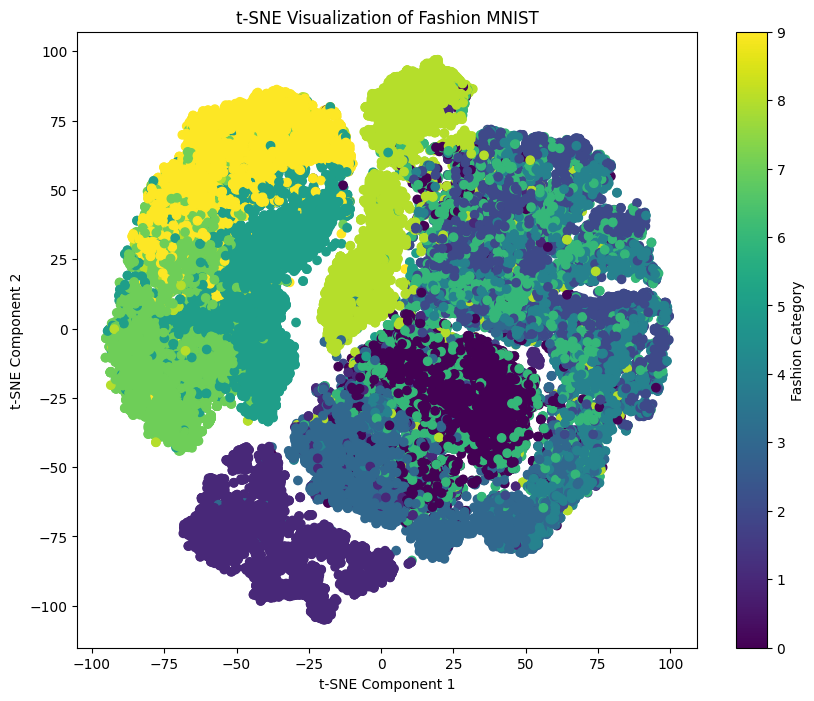

In [2]:
%%time

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X = X_train.reshape(X_train.shape[0], -1) # Flatten the images

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the transformed data
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Fashion MNIST')
plt.colorbar(ticks=range(10), label='Fashion Category')
plt.show()

**Observation Notes:**

* t-SNE effectively separates different fashion categories into distinct clusters.
* The visualization reveals the non-linear structure of the Fashion MNIST data.
* Similar items are grouped closely together, indicating that t-SNE preserves local similarities.

### Exercise 2: Experimenting with Perplexity

Experiment with different perplexity values and observe the impact on the visualization.

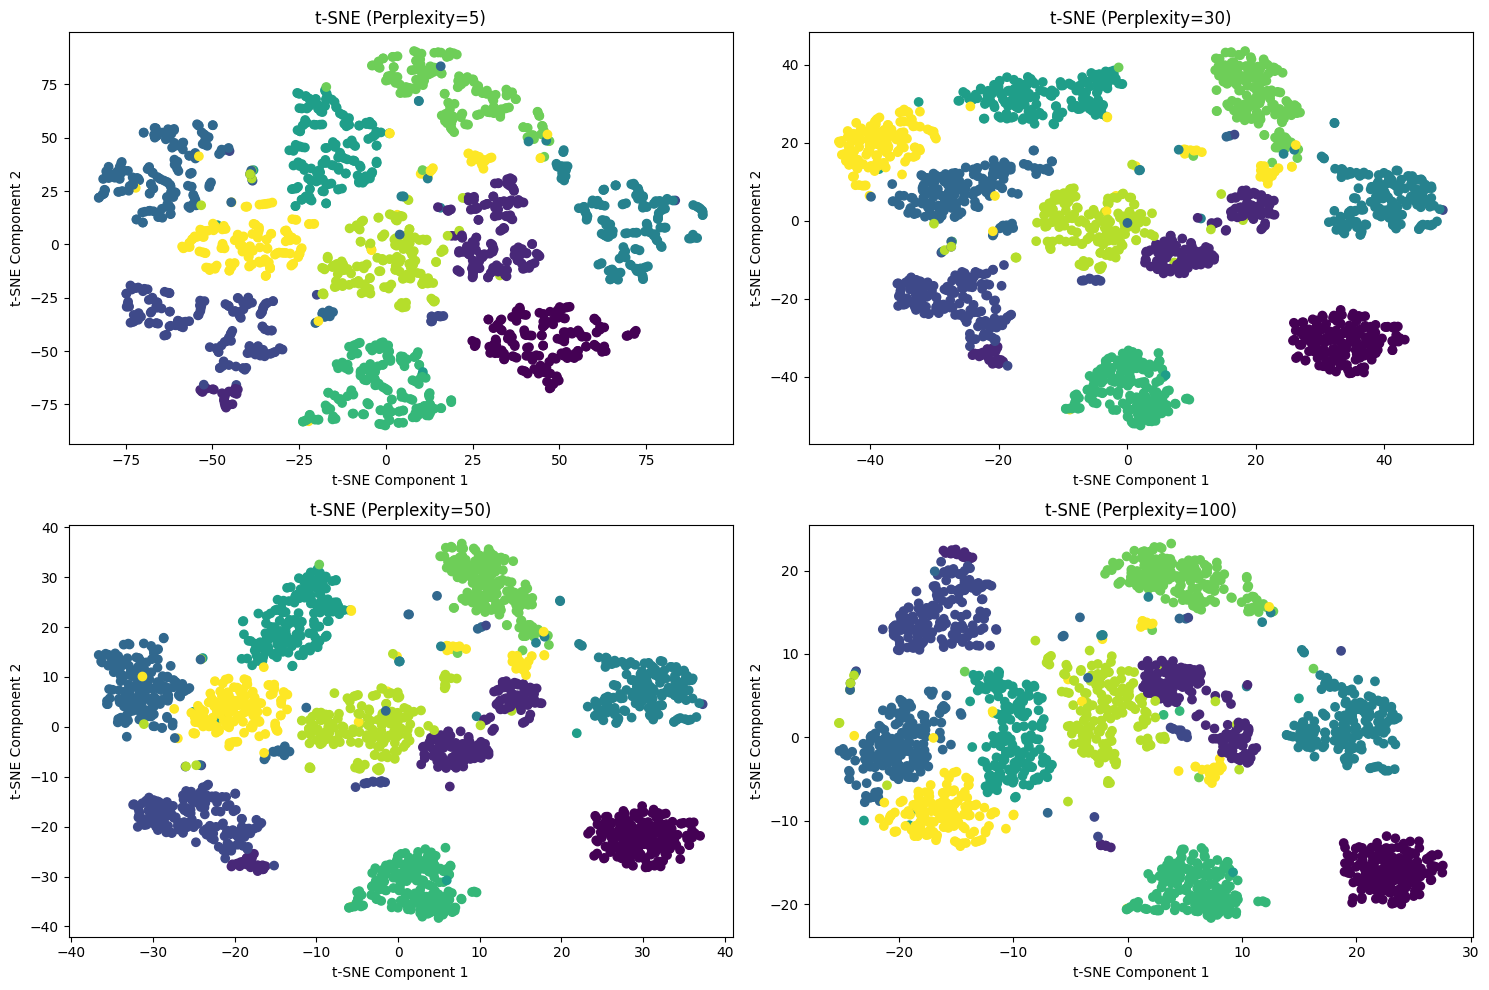

In [3]:
%%time

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE with different perplexity values
perplexities = [5, 30, 50, 100]

plt.figure(figsize=(15, 10))
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.subplot(2, 2, i + 1)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(f't-SNE (Perplexity={perplexity})')

plt.tight_layout()
plt.show()

**Observation Notes:**

* Low perplexity values (e.g., 5) result in many small clusters, focusing on very local structures.
* Higher perplexity values (e.g., 50, 100) reveal more global patterns and larger clusters.
* The choice of perplexity can significantly impact the visualization's interpretation.

### Exercise 3: Comparing t-SNE with PCA

Compare the results of t-SNE with PCA on the digits dataset.

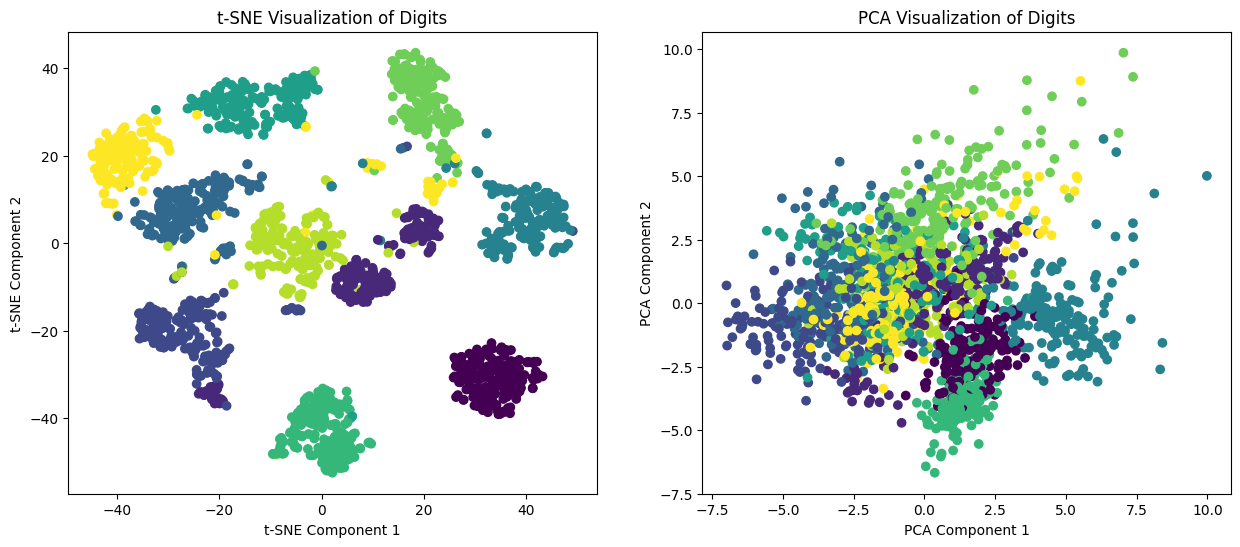

CPU times: user 27.7 s, sys: 36 ms, total: 27.7 s
Wall time: 7.38 s


In [4]:
%%time

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the transformed data
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Digits')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Digits')

plt.show()

**Observation Notes:**

* t-SNE produces a much clearer separation of digit clusters compared to PCA.
* PCA captures linear relationships, while t-SNE captures non-linear relationships.
* t-SNE is better for visualization of cluster seperation in this case.

### Exercise 4: t-SNE with Different Initialization Methods

t-SNE's initialization can influence the early stages of the optimization process. This exercise explores the impact of different initialization methods on the final t-SNE visualization. We'll compare 'random' initialization with 'pca' initialization. 'PCA' initialization uses the principal components of the data to create a more structured starting point, potentially aiding in convergence and sometimes leading to more organized initial layouts.


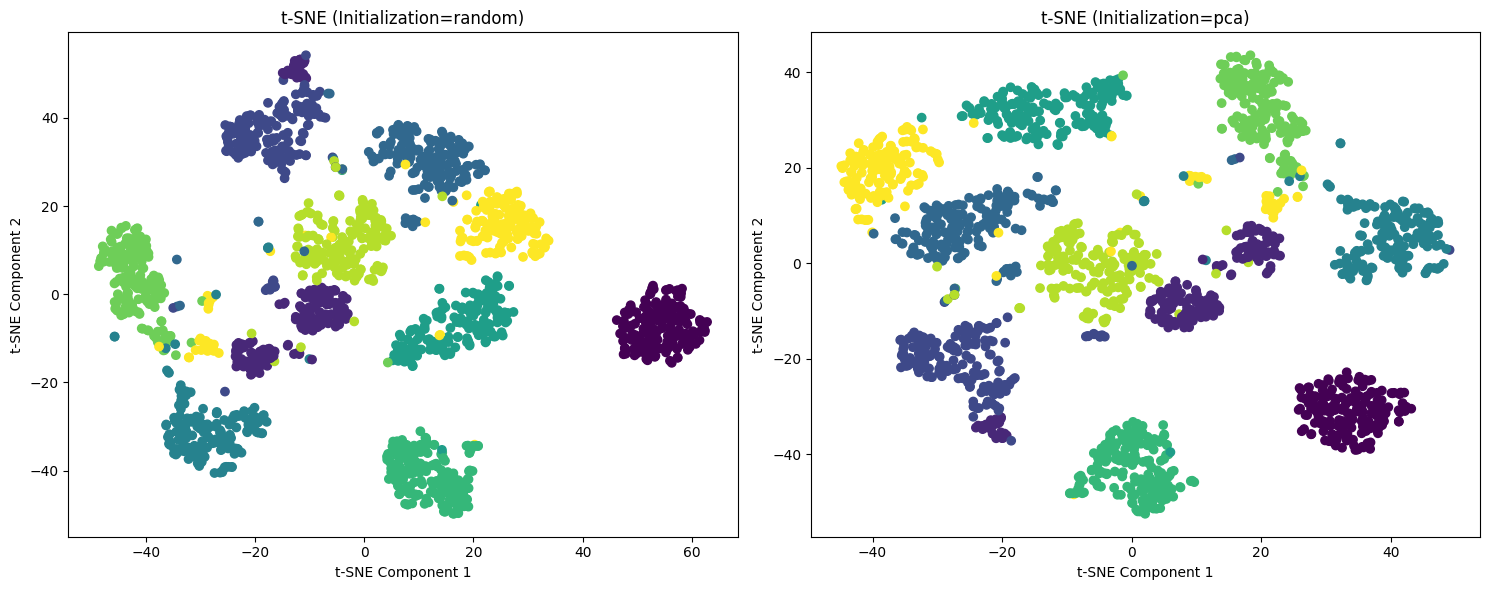

CPU times: user 1min 1s, sys: 105 ms, total: 1min 1s
Wall time: 16.5 s


In [16]:
%%time

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE with different initialization methods
initializations = ['random', 'pca']

plt.figure(figsize=(15, 6))
for i, init in enumerate(initializations):
    tsne = TSNE(n_components=2, init=init, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(f't-SNE (Initialization={init})')

plt.tight_layout()
plt.show()


**Observation Notes:**

* **Initial Structure:** Observe the initial arrangement of points in the t-SNE plots. Does 'pca' initialization lead to a more organized or structured starting configuration compared to 'random'?
* **Cluster Formation Speed:** Consider if one initialization method seems to result in faster or more stable cluster formation during the optimization process. While this code doesn't explicitly show the iterative process, you might infer differences by subtle variations in the final output.
* **Final Visualization Similarity:** Compare the final visualizations produced by both initialization methods. Do they converge to broadly similar results in terms of cluster separation and overall structure? Or are there significant differences?
* **Computational Cost:** (While not explicitly measured here) Note that 'pca' initialization involves an initial PCA computation, adding a small computational overhead.
* **Reproducibility:** Emphasize that setting the `random_state` ensures that the 'random' initialization is reproducible. Without it, results would vary each time you run the code.
* **When to Prefer PCA Initialization:** Discuss scenarios where 'pca' initialization might be particularly beneficial:
    * When dealing with very high-dimensional data, PCA initialization can provide a more stable starting point, potentially preventing the algorithm from getting stuck in poor local minima.
    * If you want to guide the initial layout of the t-SNE embedding based on the principal components.

In summary, this exercise aims to provide a more nuanced understanding of how initialization influences t-SNE, encouraging deeper analysis of the visualization characteristics and the underlying optimization process.

### Exercise 5: t-SNE with Different Learning Rates

Experiment with different learning rates for t-SNE and observe their impact on the visualization.

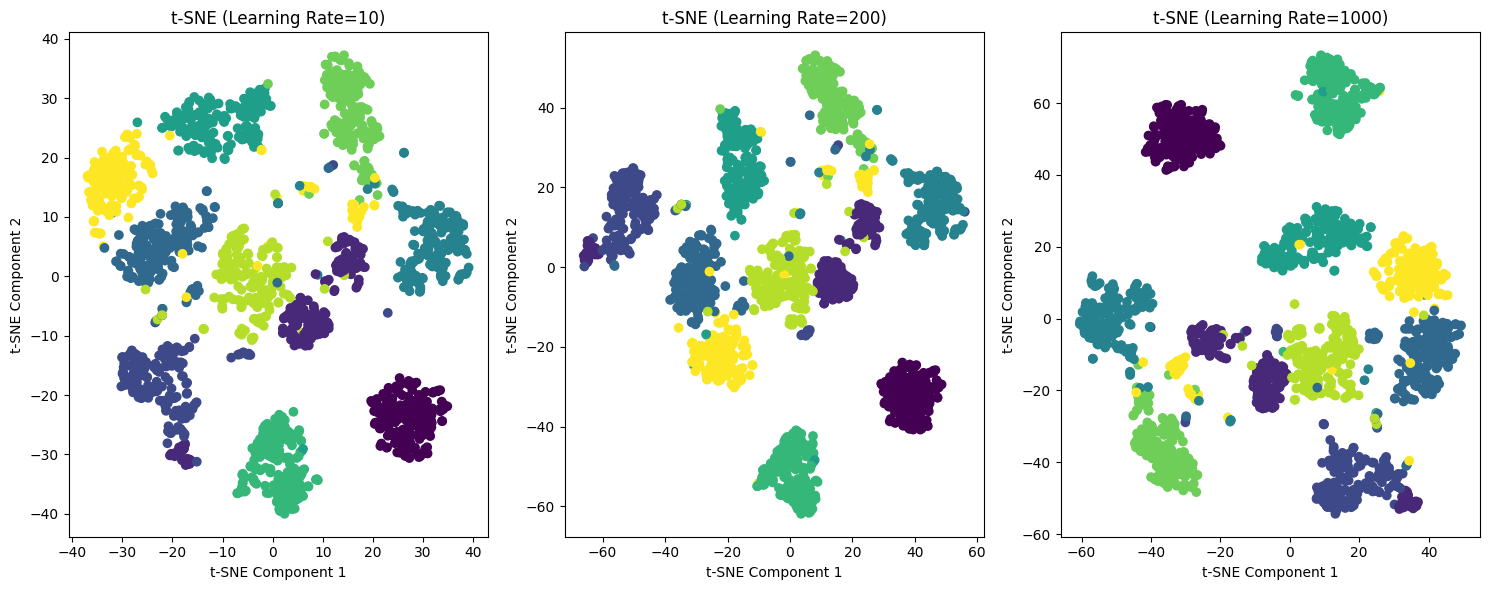

In [7]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE with different learning rates
learning_rates = [10, 200, 1000]

plt.figure(figsize=(15, 6))
for i, lr in enumerate(learning_rates):
    tsne = TSNE(n_components=2, learning_rate=lr, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.subplot(1, 3, i + 1)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(f't-SNE (Learning Rate={lr})')

plt.tight_layout()
plt.show()

**Observation Notes:**

* Very low learning rates (e.g., 10) can result in slow convergence and potentially poor visualizations, with points clustered very tightly together.
* A learning rate of 200 is often a good starting point, and tends to produce good seperation in this case.
* Very high learning rates (e.g., 1000) can lead to instability and noisy visualizations, with the algorithm overshooting the optimal solution.
* Choosing an appropriate learning rate is crucial for obtaining meaningful t-SNE visualizations.

### Exercise 6: t-SNE with Different Datasets (Breast Cancer)

Apply t-SNE to the Breast Cancer Wisconsin (Diagnostic) dataset and visualize the results.

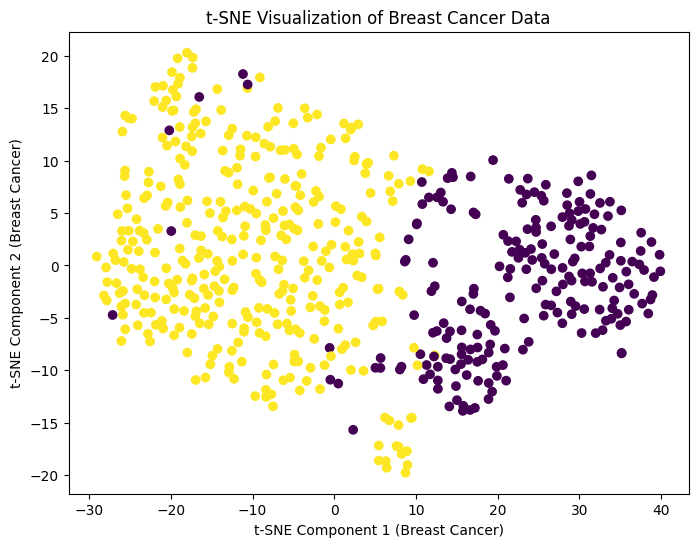

In [6]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.xlabel('t-SNE Component 1 (Breast Cancer)')
plt.ylabel('t-SNE Component 2 (Breast Cancer)')
plt.title('t-SNE Visualization of Breast Cancer Data')
plt.show()

**Observation Notes:**

* t-SNE effectively separates the malignant and benign tumors into distinct clusters.
* The visualization reveals the non-linear structure of the Breast Cancer dataset.
* This demonstrates t-SNE's ability to visualize complex medical diagnostic data.
* The separation is quite clear, showing t-SNE's usefulness for datasets with distinct classes.

### Exercise 7: t-SNE with Different Datasets (Fashion MNIST - Limited Samples)

Apply t-SNE to a smaller subset of the Fashion MNIST dataset to observe performance on less data.

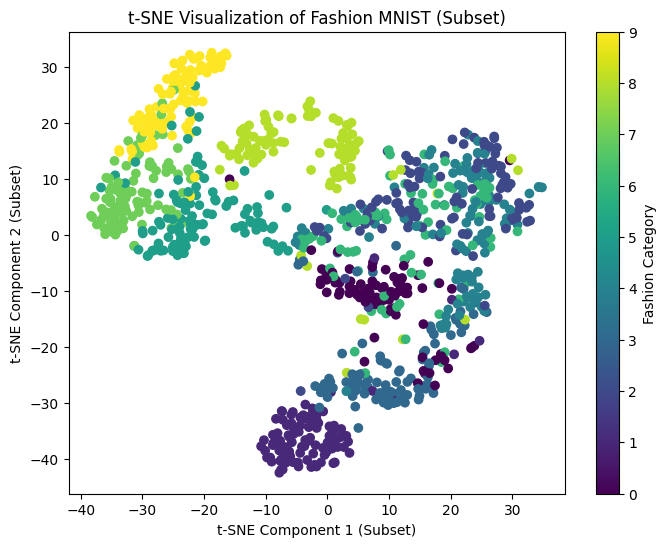

In [10]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X = X_train.reshape(X_train.shape[0], -1) # Flatten the images

# Select a smaller subset of the data
sample_size = 1000
random_indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_subset = X[random_indices]
y_subset = y_train[random_indices]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap='viridis')
plt.xlabel('t-SNE Component 1 (Subset)')
plt.ylabel('t-SNE Component 2 (Subset)')
plt.title('t-SNE Visualization of Fashion MNIST (Subset)')
plt.colorbar(ticks=range(10), label='Fashion Category')
plt.show()

**Observation Notes:**

* Even with a smaller subset of data, t-SNE still reveals meaningful clusters.
* The visualization might be less refined compared to using the entire dataset.
* This demonstrates t-SNE's ability to provide insights even with limited data.

### Exercise 8: t-SNE with Different Random States

Apply t-SNE with different random states and compare the results to see the impact of random initialization.

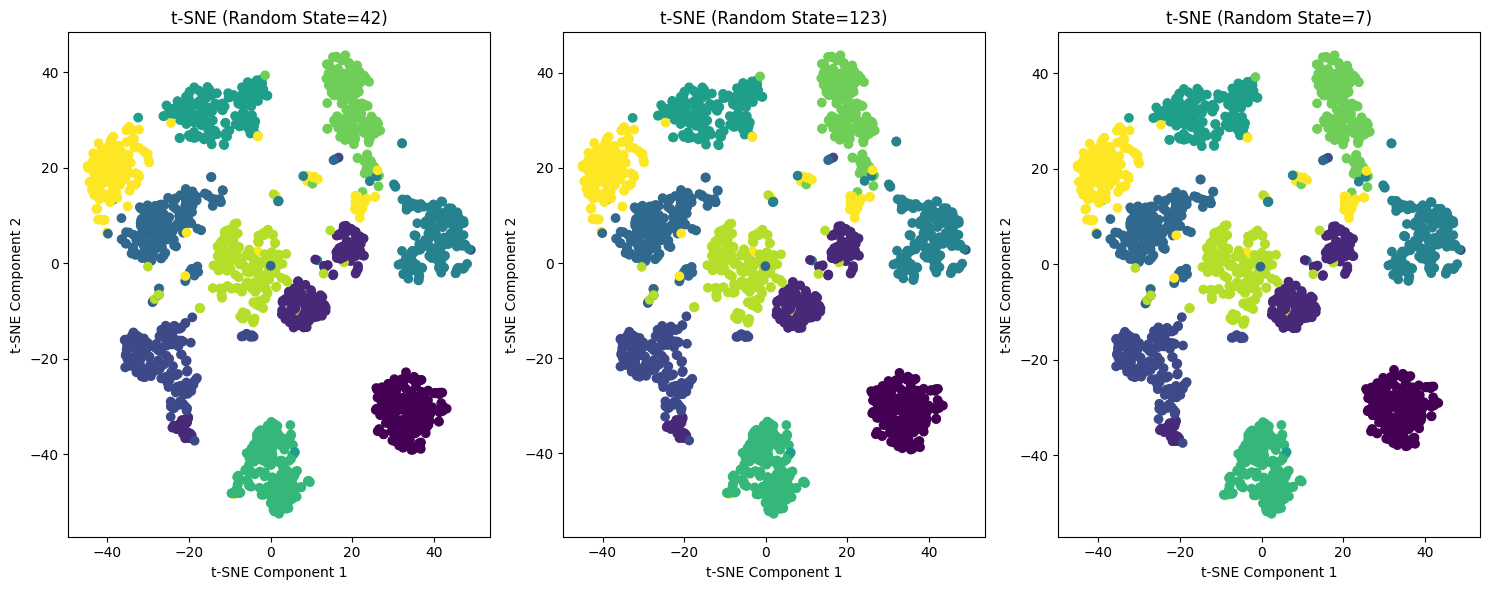

In [11]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE with different random states
random_states = [42, 123, 7]

plt.figure(figsize=(15, 6))
for i, rs in enumerate(random_states):
    tsne = TSNE(n_components=2, random_state=rs)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.subplot(1, 3, i + 1)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(f't-SNE (Random State={rs})')

plt.tight_layout()
plt.show()

**Observation Notes:**

* Different random states can lead to slightly different t-SNE visualizations.
* The overall structure and cluster separation are usually preserved.
* This emphasizes the importance of using a fixed random state for reproducibility.

### Exercise 9: t-SNE with Different Number of Components

Apply t-SNE with 3 components instead of 2, and visualize the result as a 3D plot.

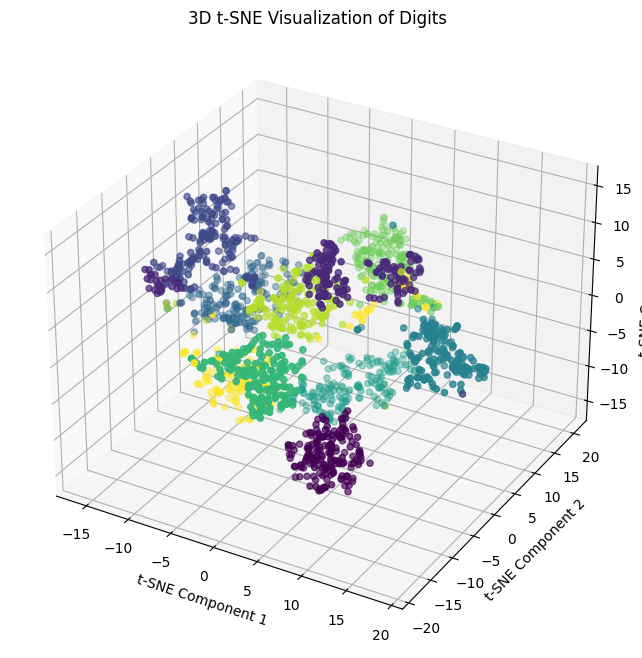

In [12]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE with 3 components
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the 3D transformed data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y, cmap='viridis')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('3D t-SNE Visualization of Digits')
plt.show()

**Observation Notes:**

* t-SNE can also be used to visualize data in 3D.
* This provides a more comprehensive view of the data's structure.
* The clusters are still well-separated, demonstrating t-SNE's effectiveness in higher dimensions.

### Exercise 10: t-SNE with Different Perplexity and Mathematical Implications

Experiment with different perplexity values and relate it to the underlying mathematics of t-SNE.

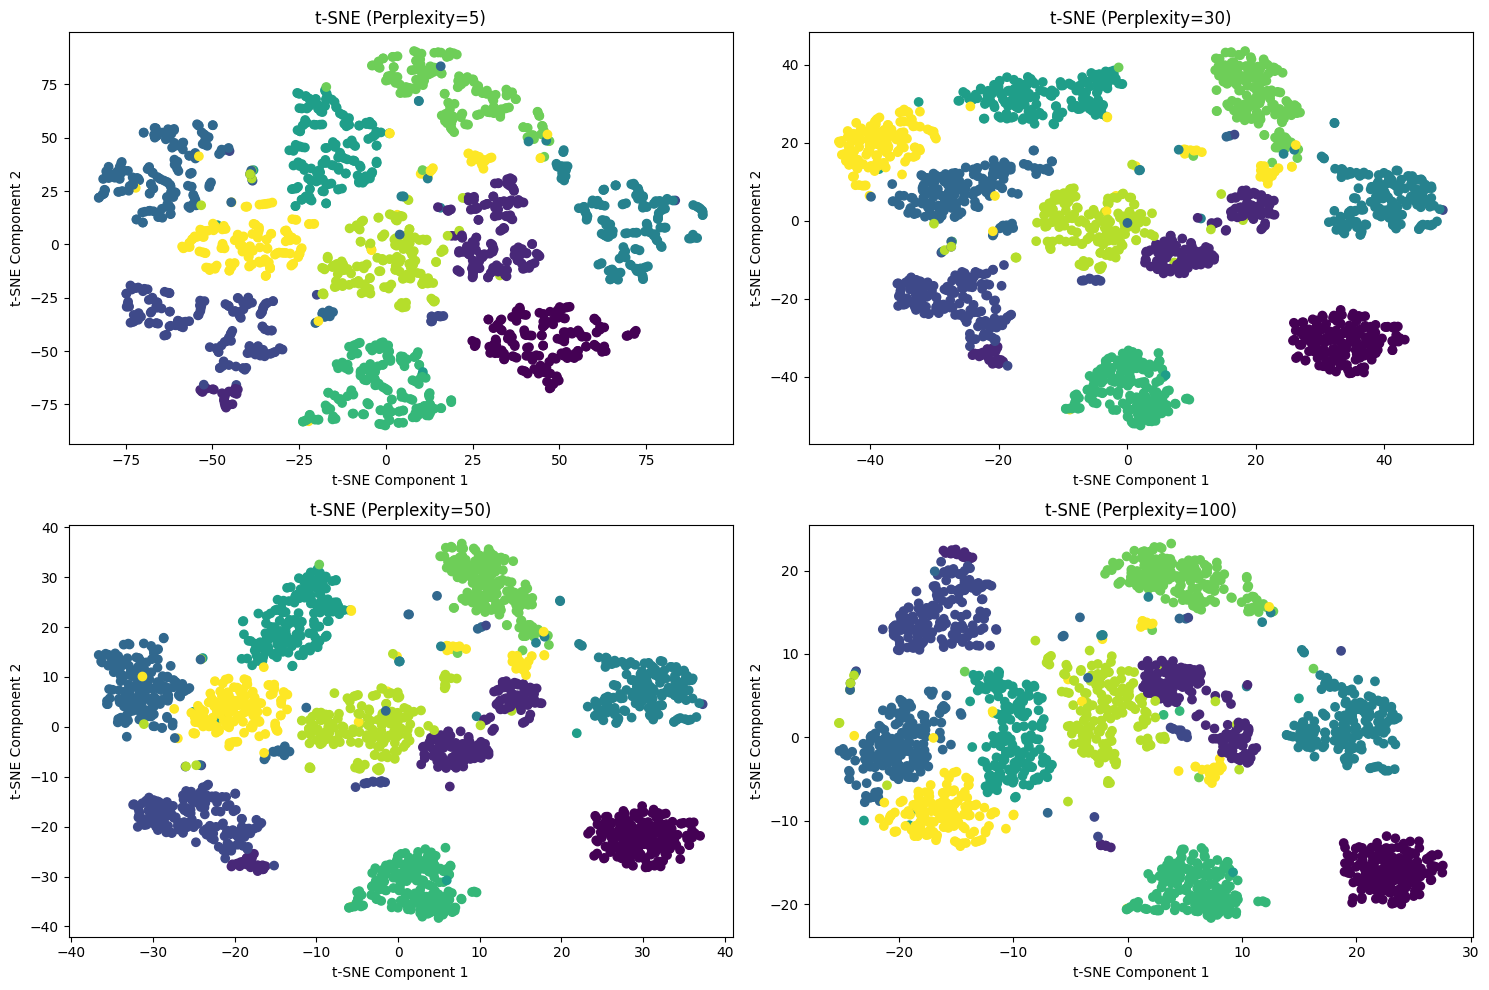

In [13]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE with different perplexity values
perplexities = [5, 30, 50, 100]

plt.figure(figsize=(15, 10))
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.subplot(2, 2, i + 1)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(f't-SNE (Perplexity={perplexity})')

plt.tight_layout()
plt.show()

**Observation Notes:**

* **Perplexity and Conditional Probability:** Perplexity is related to the effective number of neighbors each point considers. It indirectly controls the variance of the Gaussian distribution used to calculate $p_{j|i}$.
* **Low Perplexity (e.g., 5):**
    * Small Gaussian variance: Focuses on very local similarities.
    * Results in many small, tightly packed clusters.
    * Reflects a high sensitivity to minute variations in the high-dimensional space.
* **High Perplexity (e.g., 100):**
    * Large Gaussian variance: Considers a wider range of neighbors.
    * Reveals more global structures and larger clusters.
    * Represents a broader view of the data's manifold structure.
* **Mathematical Implication:** Changing perplexity alters the shape of the probability distribution in the high-dimensional space, subsequently affecting the KL divergence minimization and the resulting low-dimensional embedding.

### Exercise 11: t-SNE and KL Divergence Interpretation

Analyze t-SNE results in the context of KL divergence minimization.

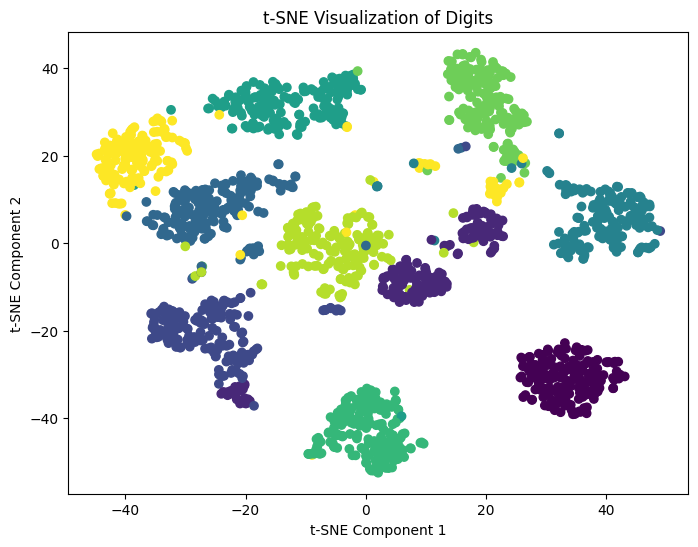

In [14]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Digits')
plt.show()

**Observation Notes:**

* **KL Divergence and Cluster Formation:** t-SNE minimizes the KL divergence between the high-dimensional and low-dimensional probability distributions.
* **Cluster Interpretation:** Well-separated clusters in the t-SNE plot indicate that the low-dimensional representation effectively preserves the local similarities observed in the high-dimensional data.
* **KL Divergence and Local Structure:** Clusters represent regions where the KL divergence is minimized, indicating that the local structures in these regions are well-preserved.
* **Non-Uniform Distances:** The distances between clusters in the t-SNE plot do not directly correspond to the distances in the original high-dimensional space. This arises from the non-linear transformation and the focus on local structure preservation.
* **Mathematical Implication:** The t-distribution used in the low-dimensional space is more forgiving to dissimilar points being far apart, which is important for visualizing the clusters.

### Exercise 12: t-SNE and Gradient Descent Dynamics

Observe the progression of t-SNE embedding during gradient descent.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.001s...
[t-SNE] Computed neighbors for 1797 samples in 0.059s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 2.377575
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.285187
[t-SNE] KL divergence after 500 iterations: 0.900531


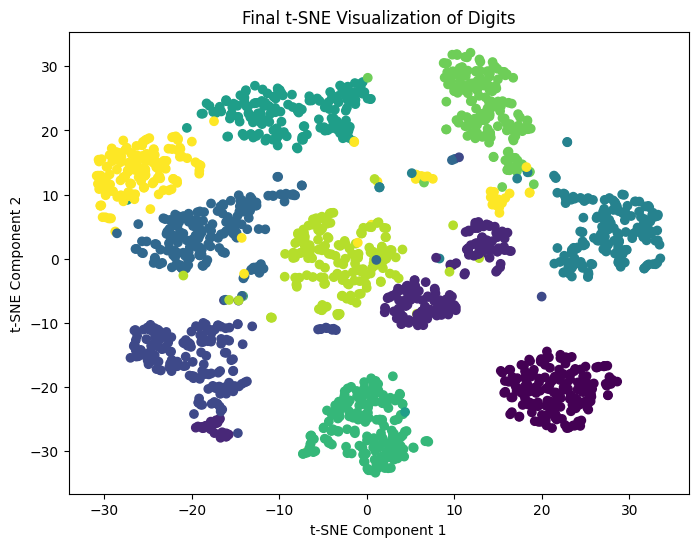

In [15]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE and store intermediate embeddings
tsne = TSNE(n_components=2, random_state=42, n_iter=500, verbose=1)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the final transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Final t-SNE Visualization of Digits')
plt.show()

**Observation Notes:**

* **Gradient Descent and Embedding Dynamics:** t-SNE uses gradient descent to minimize the KL divergence.
* **Iteration Dynamics:** During gradient descent, points move in the low-dimensional space to minimize the KL divergence.
* **Initial Randomness:** The initial random embeddings can lead to different intermediate configurations.
* **Convergence and Local Minima:** The algorithm converges to a local minimum of the KL divergence.
* **Mathematical Implication:** The gradient descent process reflects the iterative optimization of the low-dimensional embedding to match the high-dimensional similarities.
* **Verbose Output:** The verbose parameter in the TSNE method allows for the user to view the KL divergence value during the gradient descent iterations.

### Exercise 5: t-SNE with Different Distance Metrics

This exercise explores how different distance metrics influence the t-SNE visualization. By default, t-SNE uses Euclidean distance, which measures the straight-line distance between points. We will compare this with Cosine distance, which measures the angle between vectors and is often useful for high-dimensional data where the direction of the vectors is more important than their magnitude.



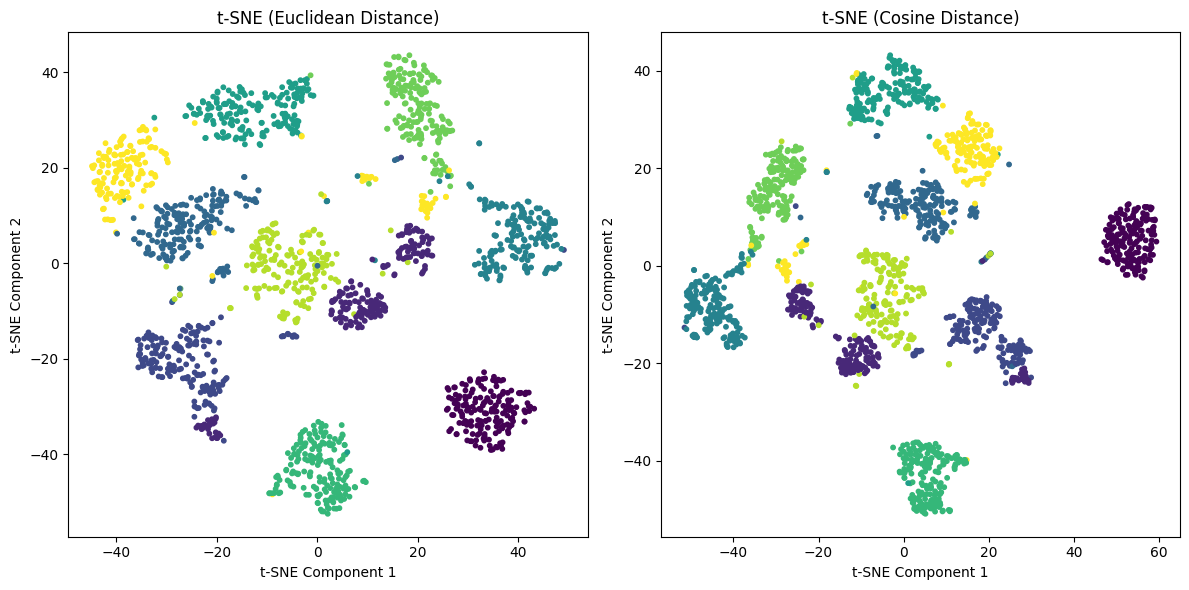

In [19]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE with Euclidean distance (default)
tsne_euclidean = TSNE(n_components=2, random_state=42, metric="euclidean")
X_tsne_euclidean = tsne_euclidean.fit_transform(X_scaled)

# Apply t-SNE with Cosine distance
cosine_dist = pairwise_distances(X_scaled, metric="cosine")  # Precompute cosine distance
tsne_cosine = TSNE(n_components=2, random_state=42, metric="precomputed", init="random")  # Change init to 'random'
X_tsne_cosine = tsne_cosine.fit_transform(cosine_dist)

# Visualize the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_tsne_euclidean[:, 0], X_tsne_euclidean[:, 1], c=y, cmap="viridis", s=10)
plt.title("t-SNE (Euclidean Distance)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

plt.subplot(1, 2, 2)
plt.scatter(X_tsne_cosine[:, 0], X_tsne_cosine[:, 1], c=y, cmap="viridis", s=10)
plt.title("t-SNE (Cosine Distance)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

plt.tight_layout()
plt.show()


**Observation Notes:**

* **Cluster Shape and Size:** Compare the shapes and sizes of the clusters produced by Euclidean and Cosine distances. Do they look similar, or are there noticeable differences?
* **Relative Distances:** Analyze the relative distances between clusters in the two visualizations. Does one metric emphasize the separation between certain digits more than the other?
* **Interpretation for High-Dimensionality:** Reflect on how the choice of distance metric might be more critical in high-dimensional datasets. When might Cosine distance be preferred over Euclidean distance?
* **Impact on Global Structure:** Does changing the distance metric seem to affect the global arrangement of the data points more or less than the local relationships?
* **Computational Cost:** Consider (though not explicitly measured here) that pre-computing the distance matrix, as done for Cosine distance, adds a computational overhead, but it might be more efficient for certain metrics or very large datasets.
* **Specific Use Cases:** Think about specific scenarios where you might choose one metric over the other. For example:
    * Euclidean: Generally good when the magnitude of features is meaningful (e.g., pixel intensities, physical measurements).
    * Cosine: Often preferred in text analysis (e.g., document similarity), gene expression analysis, or recommendation systems, where the direction of vectors is more important.
* **Effect of `init="random"`:**
    * Observe how the `init="random"` affects the starting configuration of the t-SNE embedding when using the precomputed Cosine distance matrix. Compare this to the default initialization behavior you've seen in previous exercises.
* **Impact of `s=10`:**
    * Note how the smaller marker size (`s=10`) improves the visualization, especially in areas with high data density.


### Exercise 14: t-SNE with Polynomial Feature Expansion

This exercise demonstrates how t-SNE can visualize data after a non-linear transformation. We'll use scikit-learn's `PolynomialFeatures` to expand the original features of the digits dataset into a higher-dimensional space with polynomial terms. This will allow us to observe how t-SNE handles data with non-linear relationships introduced by the transformation.


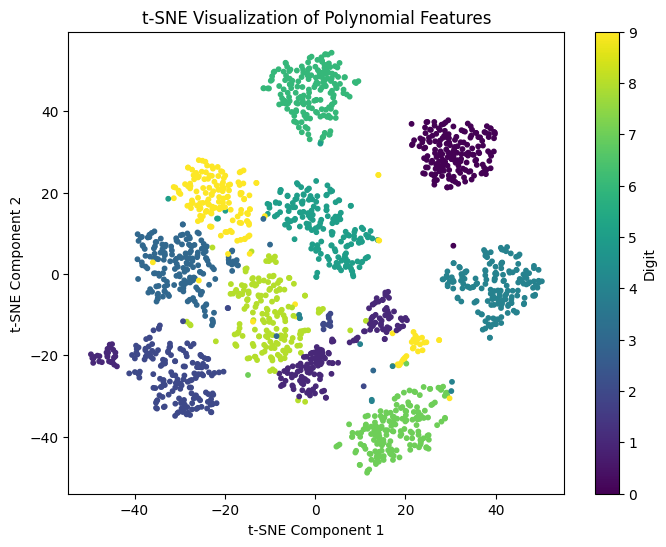

In [20]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Apply PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)  # Create polynomial features
X_poly = poly.fit_transform(X)

# Standardize the polynomial features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Apply t-SNE to the polynomial features
tsne = TSNE(n_components=2, random_state=42)
X_tsne_poly = tsne.fit_transform(X_poly_scaled)

# Visualize the t-SNE embedding
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_poly[:, 0], X_tsne_poly[:, 1], c=y, cmap='viridis', s=10)
plt.colorbar(ticks=range(10), label='Digit')
plt.title('t-SNE Visualization of Polynomial Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

**Observation Notes:**

* **Comparison to Original Data:** Compare this t-SNE visualization to the one obtained from the original digits data (in Exercise 3 or earlier). How does the polynomial transformation affect the separation of clusters?
* **Increased Complexity:** Observe if the clusters appear more intricate or complex after the polynomial expansion. This reflects the higher dimensionality and non-linear relationships introduced by the transformation.
* **Feature Importance:** While t-SNE doesn't directly indicate feature importance, consider how the polynomial terms might emphasize certain aspects of the original digits, leading to the observed cluster structure.
* **Dimensionality Impact:** Reflect on how increasing the dimensionality of the data (from 64 to a much larger number after polynomial expansion) influences the t-SNE visualization.
* **Non-linear Relationships:** Emphasize that `PolynomialFeatures` explicitly introduces non-linear relationships into the data, making it a good example for demonstrating t-SNE's strength in visualizing such data.
* **Parameter `degree`:** Encourage experimentation with different values of the `degree` parameter in `PolynomialFeatures` to see how the complexity of the transformation affects the t-SNE visualization.


# Wrapping up t-SNE


**1. Summarize Key Takeaways:**

* **Non-linear Dimensionality Reduction:** t-SNE is a powerful technique for visualizing high-dimensional data by reducing it to a lower-dimensional space (typically 2D or 3D). It excels at capturing non-linear relationships that linear methods like PCA might miss.
* **Local Structure Preservation:** t-SNE's primary goal is to preserve the local similarities between data points, making it effective for revealing clusters and patterns.
* **Mathematical Foundation:** t-SNE involves calculating pairwise similarities in both high-dimensional space (using Gaussian distributions) and low-dimensional space (using t-distributions). It then minimizes the Kullback-Leibler (KL) divergence between these similarity distributions to find an optimal low-dimensional representation.
* **Implementation Considerations:** t-SNE's implementation involves steps like calculating pairwise similarities, initializing embeddings, computing KL divergence, and updating embeddings using gradient descent.
* **Parameter Tuning:** t-SNE's visualizations are sensitive to parameters like perplexity and learning rate, and experimenting with different values is crucial.
* **Limitations:** t-SNE is computationally expensive for large datasets, primarily focuses on local structures, and the distances between clusters in t-SNE plots don't always reflect original distances. Also, t-SNE is best used for visualization, not for dimensionality reduction for machine learning.
* **Applications:** t-SNE can be applied to various datasets, like Fashion MNIST, and can be used to visualize complex data structures and feature representations.

**2. Address Lingering Questions:**

Do you have any questions about t-SNE? Perhaps about a specific exercise, a concept we discussed, or anything else related to the topic? I'm here to clarify any doubts you might have.

**3. Offer Further Resources:**

If you'd like to explore t-SNE further, here are some resources you might find helpful:

* **Original t-SNE paper:** You can find the original research paper by van der Maaten and Hinton for a deep dive into the theory.
    * [Visualizing Data using t-SNE](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)
* **scikit-learn documentation:** The scikit-learn documentation for `TSNE` provides detailed information about the implementation and parameters.
    * [sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
* **Online tutorials and blog posts:** Many excellent tutorials and blog posts explain t-SNE with various examples and visualizations. Search for "t-SNE tutorial" to find them.

